In [42]:
import pandas as pd
data = pd.read_csv(r'C:\Users\USER\Chameleon\MOP-Code\artificial-intelligence\Traffic Analysis\dataset\traffic_volume_analysis.csv')


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Select relevant features
features = [
    'road_name_encoded', 'location_encoded', 'suburb_encoded', 
    'speed_limit', 'hour', 'day_of_week', 'month', 'average_speed'
]
target = 'Total_Traffic_Volume'

# Encode categorical variables
label_encoder = LabelEncoder()
data['day_type_encoded'] = label_encoder.fit_transform(data['day_type'])

# Prepare the final features list including encoded 'day_type'
final_features = features + ['day_type_encoded']
# Split data into training and testing sets
X = data[final_features]
y = data[target]
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.ensemble import ExtraTreesRegressor

# Train the Extra Trees Regressor
extra_trees_model = ExtraTreesRegressor(random_state=42)
extra_trees_model.fit(X_train, y_train)

# Predictions
y_pred_extra_trees = extra_trees_model.predict(X_test)

# Evaluate the model
r2_extra_trees = r2_score(y_test, y_pred_extra_trees)
mae_extra_trees = mean_absolute_error(y_test, y_pred_extra_trees)
rmse_extra_trees = np.sqrt(mean_squared_error(y_test, y_pred_extra_trees))

r2_extra_trees, mae_extra_trees, rmse_extra_trees


(0.9230260744861206, 19.906958574599255, 49.925876251287185)

In [62]:
def validate_and_filter_encoded_input(road_name_encoded, location_encoded, suburb_encoded, data):
    """
    Validates individual encoded inputs (road_name_encoded, location_encoded, and suburb_encoded) and then checks if 
    the combination exists. If any individual value or the combination is missing, an appropriate error is raised.
    """
    
    # Check if individual encoded inputs exist in the dataset
    if road_name_encoded not in data['road_name_encoded'].unique():
        raise ValueError(f"Road name (encoded) '{road_name_encoded}' not found in the dataset.")
    
    if location_encoded not in data['location_encoded'].unique():
        raise ValueError(f"Location (encoded) '{location_encoded}' not found in the dataset.")
    
    if suburb_encoded not in data['suburb_encoded'].unique():
        raise ValueError(f"Suburb (encoded) '{suburb_encoded}' not found in the dataset.")
    
    # Filter the dataset based on the combination of encoded road_name, location, and suburb
    filtered_data = data[
        (data['road_name_encoded'] == road_name_encoded) &
        (data['location_encoded'] == location_encoded) &
        (data['suburb_encoded'] == suburb_encoded)
    ]
    
    # Check if the filtered data is empty (i.e., the combination doesn't exist)
    if filtered_data.empty:
        raise ValueError(f"No data found for the combination of road_name_encoded '{road_name_encoded}', location_encoded '{location_encoded}', and suburb_encoded '{suburb_encoded}'.")

    print("All input encoded values and combination are valid.")
    return filtered_data

# Example inputs (replace with actual encoded values you want to filter)
road_name_encoded_input = 107  # Example encoded road name
location_encoded_input = 103   # Example encoded location
suburb_encoded_input = 4       # Example encoded suburb

# Validate and filter input using encoded features
try:
    filtered_data = validate_and_filter_encoded_input(road_name_encoded_input, location_encoded_input, suburb_encoded_input, data)
    print("Filtered data is ready for prediction or further processing.")
except ValueError as e:
    print(e)


All input encoded values and combination are valid.
Filtered data is ready for prediction or further processing.


In [64]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Train the Extra Trees Regressor (Assuming X_train and y_train are prepared earlier)
model = ExtraTreesRegressor(random_state=42)
model.fit(X_train, y_train)

# Example input for prediction (this input must have the same structure as the training features)
# Let's say you have the following inputs (encoded values for road_name, location, and suburb, along with other features)
input_features = {
    'road_name_encoded': 107,
    'location_encoded': 103,
    'suburb_encoded': 4,
    'speed_limit': 50,
    'hour': 16,
    'day_of_week': 5,
    'month': 10,
    'average_speed': 35.5,
    'day_type_encoded': 1
}

# Convert the input data into a DataFrame for prediction
input_df = pd.DataFrame([input_data])

# Make predictions using the trained model
predicted_traffic_volume = model.predict(input_df)

print(f"Predicted Total Traffic Volume: {predicted_traffic_volume[0]}")


Predicted Total Traffic Volume: 52.18172871392808


In [65]:
# Input features for filtering (these are the same as the prediction input)
input_features = {
    'road_name_encoded': 107,
    'location_encoded': 103,
    'suburb_encoded': 4,
    'speed_limit': 50,
    'hour': 16,
    'day_of_week': 5,
    'month': 10,
    'average_speed': 35.5,
    'day_type_encoded': 1
}


# Filter the dataset based on these input features
filtered_actual_data = data[
    (data['road_name_encoded'] == input_features['road_name_encoded']) &
    (data['location_encoded'] == input_features['location_encoded']) &
    (data['suburb_encoded'] == input_features['suburb_encoded']) &
    (data['speed_limit'] == input_features['speed_limit']) &
    (data['hour'] == input_features['hour']) &
    (data['day_of_week'] == input_features['day_of_week']) &
    (data['month'] == input_features['month']) &
    (data['average_speed'] == input_features['average_speed']) &
    (data['day_type_encoded'] == input_features['day_type_encoded'])
]

# Check if there is any matching data
if not filtered_actual_data.empty:
    # Retrieve the actual total traffic volume
    actual_traffic_volume = filtered_actual_data['Total_Traffic_Volume'].values
    print(f"Actual Total Traffic Volume: {actual_traffic_volume[0]}")
else:
    print("No matching actual data found in the dataset for the given input.")


Actual Total Traffic Volume: 34.29217885759312


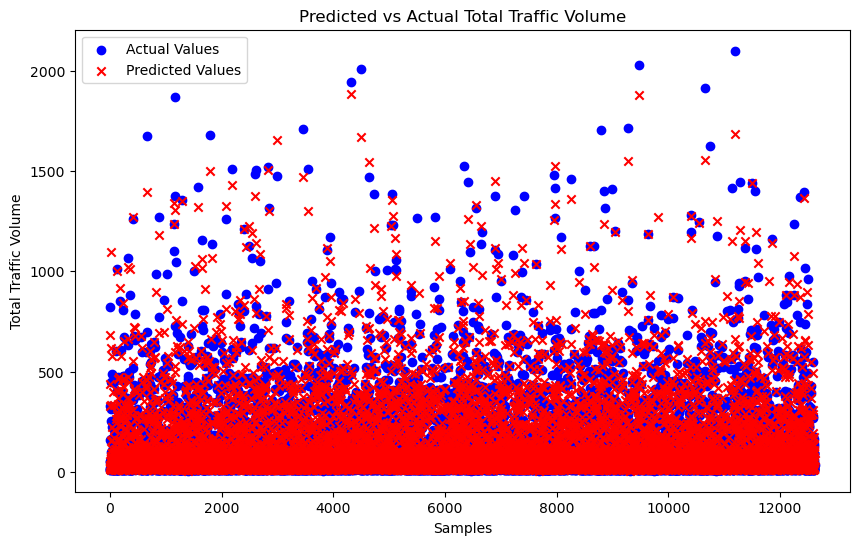

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Assuming you've already made predictions on the test set
# Replace these with your actual predictions and actual values

# Let's assume predicted_traffic_volumes is an array of predicted values
# And actual_traffic_volumes is an array of actual values
predicted_traffic_volumes = model.predict(X_test)
actual_traffic_volumes = y_test  # These are the true values from the test set

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))

# Scatter plot of predicted vs actual
plt.scatter(np.arange(len(actual_traffic_volumes)), actual_traffic_volumes, color='blue', label='Actual Values', marker='o')
plt.scatter(np.arange(len(predicted_traffic_volumes)), predicted_traffic_volumes, color='red', label='Predicted Values', marker='x')

# Labels and title
plt.xlabel("Samples")
plt.ylabel("Total Traffic Volume")
plt.title("Predicted vs Actual Total Traffic Volume")
plt.legend()

# Display the plot
plt.show()


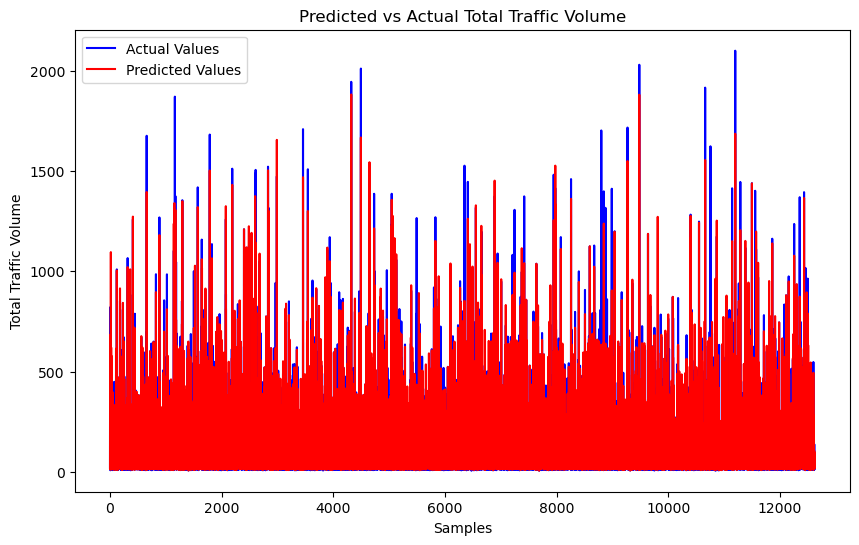

In [67]:
# Line plot of predicted vs actual
plt.figure(figsize=(10, 6))

# Line plot for actual values
plt.plot(np.arange(len(actual_traffic_volumes)), actual_traffic_volumes, color='blue', label='Actual Values')

# Line plot for predicted values
plt.plot(np.arange(len(predicted_traffic_volumes)), predicted_traffic_volumes, color='red', label='Predicted Values')

# Labels and title
plt.xlabel("Samples")
plt.ylabel("Total Traffic Volume")
plt.title("Predicted vs Actual Total Traffic Volume")
plt.legend()

# Display the plot
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_29504\4019515980.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual_traffic_volumes, hist=False, color="blue", label="Actual Traffic Volume")
C:\Users\USER\AppData\Local\Temp\ipykernel_29504\4019515980.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

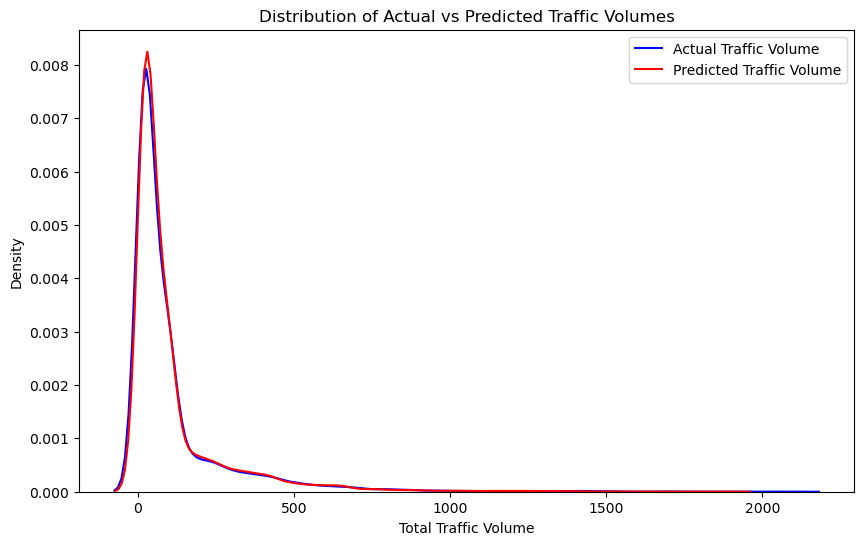

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the distribution of actual traffic volumes
sns.distplot(actual_traffic_volumes, hist=False, color="blue", label="Actual Traffic Volume")

# Plot the distribution of predicted traffic volumes
sns.distplot(predicted_traffic_volumes, hist=False, color="red", label="Predicted Traffic Volume")

# Add labels and title
plt.xlabel("Total Traffic Volume")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted Traffic Volumes")
plt.legend()

# Display the plot
plt.show()
